In [58]:
%matplotlib inline
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Least Squares

Part a)

$g(W) = (X.W-Y)^{T}(X.W-Y)$

$g^{'}(W) = X^{T}XW - X^{T}Y$

Part b)

For minima, $g^{'}(W) = 0$

$X^{T}XW_{min} - X^{T}Y = 0$

$X^{T}XW_{min} = X^{T}Y$

$W_{min} = (X^{T}X)^{-1}X^{T}Y$

## Load Data

In [7]:
X_and_Y = np.load('data/q1-least-square.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

## Plot the scatter graph of data

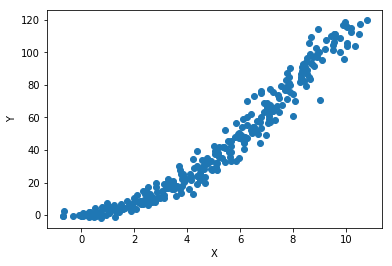

In [9]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Compute the least square line over the given data

In [10]:
# Assume Y = w0 + w1*X = (w0, w1).(1, X) = W.X1
# X1 contains 1 and X.
X1 = np.matrix(np.hstack((np.ones((len(X),1)),
X.reshape(-1,1))))
W = X1.T.dot(X1).I.dot(X1.T).dot(Y)
w0, w1 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


## Plot the scatter graph of data and estimated line

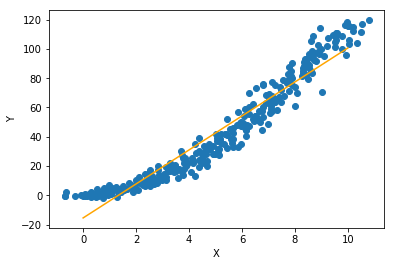

In [11]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Compute the least square parabola over the given data

In [12]:
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.ones((len(X),1)),
X.reshape(-1,1), np.square(X.reshape(-1,1)))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = -1.71 + 3.02*X + 0.87*Xˆ2


## Plot the scatter graph of data and estimated parabola

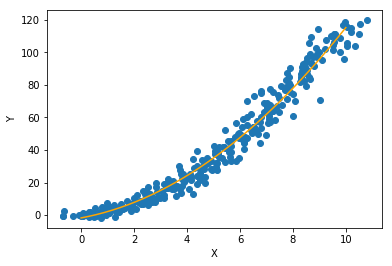

In [13]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Parabola Estimation

## Load Data

In [29]:
X_and_Y = np.load('data/q2-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

## Compute the least square parabola over the given data

In [30]:
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.ones((len(X),1)),
X.reshape(-1,1), np.square(X.reshape(-1,1)))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


## Plot the scatter graph of data and estimated parabola

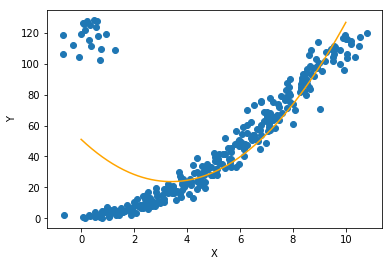

In [31]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Derivative

$g(W) = |X.W - Y|$

$\frac{dg(W)}{dW} = \frac{d}{dW} |X.W - Y|$

Since $\frac{d|x|}{dx} = sign(x)$ for $x!=0$ ,

Hence using the above information along with the chain rule

$\frac{dg(W)}{dW} = (sign(X.W - Y)^{T}.X)^{T}$

## Gradient Descent

In [55]:
W = np.random.random(size=(3,1))
X2 = np.matrix(np.hstack((np.ones((len(X),1)),
X.reshape(-1,1), np.square(X.reshape(-1,1)))))
Y = Y.reshape(-1,1)
lr = 0.0001
thresh = 0.00001
prev_loss = np.inf
it = 0
while True:
    loss = abs(X2.dot(W)-Y).sum()
    print('Iteration ',it,' Loss',loss)
    delta = np.mean(np.sign(X2.dot(W)-Y).T.dot(X), axis=0)
    W -= lr*delta
    if prev_loss-loss<thresh:
        break
    prev_loss = loss
    it += 1
    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

('Iteration ', 0, ' Loss', 11222.399284120014)
('Iteration ', 1, ' Loss', 9452.485016727484)
('Iteration ', 2, ' Loss', 7700.30704446723)
('Iteration ', 3, ' Loss', 5989.913351408704)
('Iteration ', 4, ' Loss', 4498.488173619595)
('Iteration ', 5, ' Loss', 3721.370523776223)
('Iteration ', 6, ' Loss', 3639.1506298787044)
('Iteration ', 7, ' Loss', 3640.161787831721)
Y = 1.19 + 0.75*X + 1.11*Xˆ2


## Plot the scatter graph of data and estimated parabola

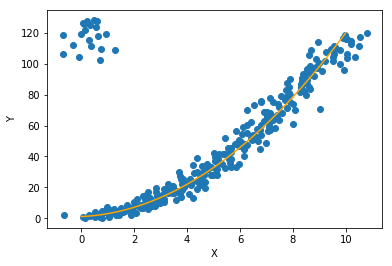

In [56]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Perceptron

## Load Iris data

In [60]:
# load iris_train.data and iris_test.data
pd_train = pd.read_csv("data/iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("data/iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


In [61]:
w = np.random.random(size=(5,1))
lr = 0.01
thresh = 0.001
prev_loss = 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3